In [ ]:
from keras.src.utils import to_categorical

from hyperparamaters import TrainHyperparameters, ArchitectureHyperparameters
from model_builder import ModelBuilder
import tensorflow as tf


In [3]:
class MyModelBuilder(ModelBuilder):
    def model_building_function(self, callbacks=None) -> tf.keras.Model:
        classes = self.model_trainer.get_classes()

        flatten_layer = tf.keras.layers.Flatten(input_shape=self.model_trainer.get_input_shape())
        layers = [flatten_layer]

        for i in range(self.architecture_hp.layer_count):
            layers.append(tf.keras.layers.Dense(
                self.architecture_hp.layer_count,
                activation=self.architecture_hp.activation_function)
            )
        layers.append(tf.keras.layers.Dense(classes, activation='softmax'))

        model = tf.keras.models.Sequential(layers)
        return model

    @staticmethod
    def data_function(data_function = None):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        return (x_train, to_categorical(y_train)), (x_test, to_categorical(y_test))


In [ ]:
train_hp = TrainHyperparameters(
        epochs=10,
    )
architecture_hp = ArchitectureHyperparameters(
        neurons_per_layer_count= 50,
        layer_count= 5,
        activation_function="relu"
    )
model_builder = (MyModelBuilder()
                     .set_hyper_parameters(architecture_hp,train_hp)
                     .set_model_trainer()
                     )
model = model_builder.build_model()

In [2]:
import matplotlib.pyplot as plt

def plot_digit(image, label=None):
    plt.imshow(image, cmap="gray")  # Plot in grayscale
    title = f"Digit: {label}" if label is not None else "Digit"
    plt.title(title)
    plt.axis("off")  # Hide axes
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]]


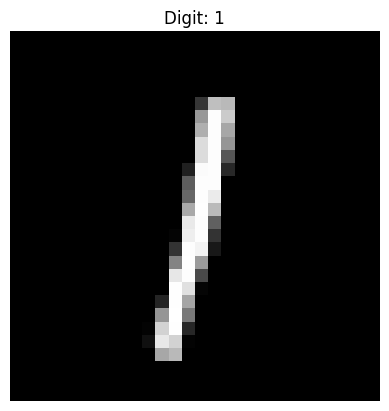

In [39]:
import numpy as np
x_test, y_test = model_builder.get_test_set()
sample_index = 2137
sample_x = tf.expand_dims(x_test[sample_index], axis=0)
sample_y = tf.expand_dims(y_test[sample_index], axis=0)

prediction = model.predict(sample_x)
np.set_printoptions(formatter={'float': '{:.3f}'.format})

print(prediction)
plot_digit(
    x_test[sample_index],
    np.argmax(y_test[sample_index])
)